# Develop machine learning models to classify notMNIST images

**Author:** Andrea Murphy 

### Initial Setup and Imports

In [1]:
#Imports
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Input, Conv2D, SeparableConv2D, MaxPool2D, Dropout, Dense, Flatten
from keras.callbacks import EarlyStopping
from keras.optimizers import sgd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input/comp-850-project-1/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


/kaggle/input/comp-850-project-1/ytr.npy
/kaggle/input/comp-850-project-1/xte.npy
/kaggle/input/comp-850-project-1/xtr.npy
/kaggle/input/comp-850-project-1/sample_submission.csv


In [2]:
#Define the data
xtr = np.load('../input/comp-850-project-1/xtr.npy')
xte = np.load('../input/comp-850-project-1/xte.npy')
ytr = np.load('../input/comp-850-project-1/ytr.npy')

### Images from the uncleaned data

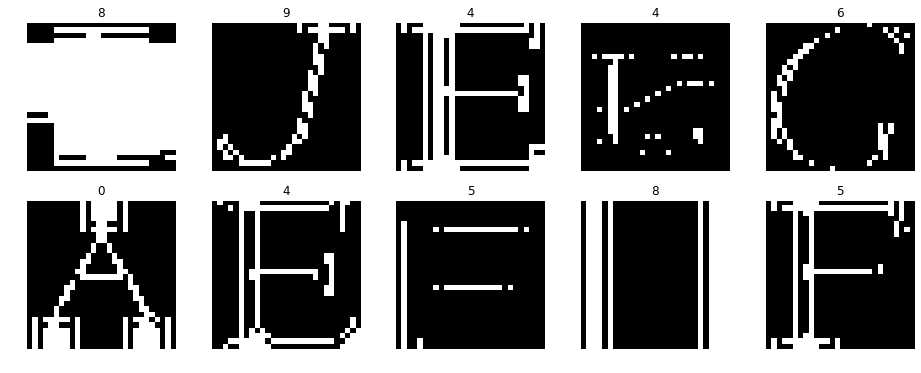

In [3]:
# Plot Sample Images
fig, ax = plt.subplots(2, 5, figsize=(16, 6))
for i in range(5):
    for j in range(2):
        idx = np.random.randint(low=0, high=60000, size=1)[0]
        ax[j, i].imshow(xtr[idx, :, :], cmap='gray')
        ax[j, i].set_title(ytr[idx])
        ax[j, i].axis('off')

### Create Model

In [4]:
from keras import layers
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, 3, input_shape=(28, 28, 1), padding='same', activation='relu'))
model.add(MaxPool2D(2, 2))  
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, 3, padding='same', activation='relu'))

model.add(layers.Dropout(0.5))
model.add(Flatten()) 
model.add(Dense(10, activation='softmax'))

# Stop training when a monitored quantity has stopped improving
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# stochastic gradient descent
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

### Preparing the Data

In [6]:
from tensorflow.keras.utils import to_categorical

xtr = np.expand_dims(xtr, -1).astype(np.float32) / 255
xte = np.expand_dims(xte, -1).astype(np.float32) / 255
ytr = to_categorical(ytr)

In [7]:
ytr.shape

(60000, 10)

### Shuffle the data 

In [8]:
shuffle_index = np.random.permutation(60000)
xtr, ytr = xtr[shuffle_index], ytr[shuffle_index]

### Define parameters for training and fit the model

In [9]:
history = model.fit(xtr, ytr, 
                    validation_split=0.2,
                    batch_size=64, epochs=50,
                    callbacks=[early_stop])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 8s 177us/step - loss: 1.1148 - acc: 0.6603 - val_loss: 0.7221 - val_acc: 0.8012
Epoch 2/50
48000/48000 [==============================] - 4s 91us/step - loss: 0.7174 - acc: 0.7952 - val_loss: 0.6471 - val_acc: 0.8132
Epoch 3/50
48000/48000 [==============================] - 4s 88us/step - loss: 0.6540 - acc: 0.8086 - val_loss: 0.5975 - val_acc: 0.8226
Epoch 4/50
48000/48000 [==============================] - 4s 90us/step - loss: 0.6189 - acc: 0.8162 - val_loss: 0.5805 - val_acc: 0.8256
Epoch 5/50
48000/48000 [==============================] - 4s 90us/step - loss: 0.5996 - acc: 0.8219 - val_loss: 0.5505 - val_acc: 0.8344
Epoch 6/50
48000/48000 [==============================] - 4s 93us/step - loss: 0.5857 - acc: 0.8244 - val_loss: 0.5339 - val_acc: 0.8396
Epoch 7/50
48000/48000 [==============================] - 4s 91us/step - loss: 0.5704 - acc: 0.8290 - val_loss: 0.5255 - val_ac

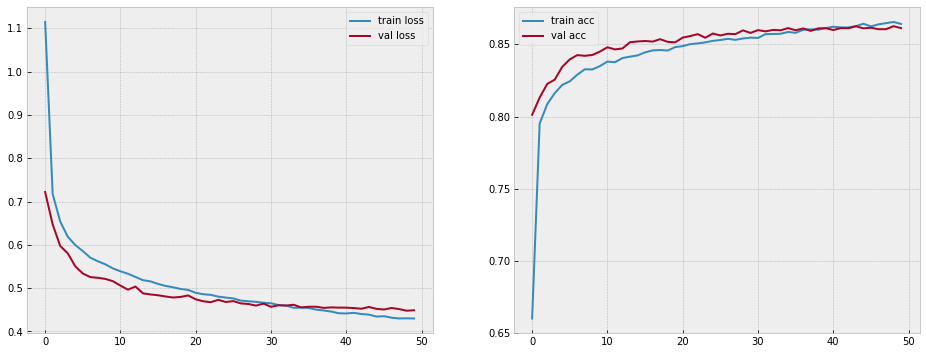

In [10]:
plt.style.use('bmh')
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(history.history['loss'], label='train loss')
ax[0].plot(history.history['val_loss'], label='val loss')
ax[0].legend()
ax[1].plot(history.history['acc'], label='train acc')
ax[1].plot(history.history['val_acc'], label='val acc')
ax[1].legend()

In [11]:
print(history.history['acc'])

[0.6603125, 0.7951875, 0.8085833, 0.81620836, 0.8219375, 0.82441664, 0.829, 0.83275, 0.83264583, 0.8349583, 0.8380833, 0.837625, 0.8405, 0.8415, 0.8423542, 0.84445834, 0.8458125, 0.84608334, 0.8457292, 0.8481042, 0.84877086, 0.8501667, 0.85066664, 0.851375, 0.8524167, 0.85302085, 0.8538333, 0.853125, 0.8540625, 0.85466665, 0.8544375, 0.8570833, 0.85716665, 0.85733336, 0.85858333, 0.8579792, 0.86010414, 0.86041665, 0.86010414, 0.86127084, 0.8622083, 0.86175, 0.8616667, 0.86260414, 0.8642708, 0.86245835, 0.86385417, 0.86466664, 0.8655, 0.8641458]


### Prediction scores

In [12]:
# make predictions
pred = model.predict(xte)
categorical_pred = np.argmax(pred, axis=1)

### Create submission.csv file 

In [13]:
submission = pd.read_csv('/kaggle/input/comp-850-project-1/sample_submission.csv')
submission['Category'] = categorical_pred
submission.to_csv('submission_Murphy.csv', index=False)